# Simple and Multiple Linear Regression

## Part 1: Simple Linear Regression

### Objectives

1. Use scikit-learn to implement simple linear regression
2. Create, train, and test a linear regression model on real data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'

In [3]:
df = pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Understanding the data

`Fuelconsumption.csv`

We will use a fuel consumption dataset, `Fuelconsumption.csv`, which contains model-specific fuel consumption ratings and estimated carbon-dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64).

Data set contains the following columns:
1. MODELYEAR
2. MAKE
3. MODEL
4. VEHICLECLASS
5. ENGINESIZE
6. CYLINDERS
7. TRANSMISSION
8. FUELTYPE
9. FUELCONSUMPTION_CITY
10. FUELCONSUMPTION_HWY
11. FUELCONSUMPTION_COMB
12. FUELCONSUMPTION_COMB_MPG
13. CO2EMISSIONS

Our task will be to create a simple linear regression model from one of these features(columns) to predict CO2 emissions of unobserved cars based on that feature.

In [4]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [5]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

#### Explore the data
First, consider a statistical summary of the data.

In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


When we run `df.describe()`, it provides summary statistics for all numerical columns in our dataset. Which includes:
1. Count (No of values)
2. Mean (avg)
3. Standard Deviation (Spread of data)
4. Min and Max Values (lowest and highest)
5. Percentiles(25%, 50%, 75%) (distribution of values)

Fuel consumption Analysis (MPG Values)
We have MPG(Miles Per Gallon) values in our dataset.
1. The minimum is 11mpg - This means minimum number of cars have fuel consumption below or equal to 11 MPG (least efficient cars).
2. The 75% is 31 MPG -This means 75% of cars have fuel consumption below or equal to 31 MPG (Moderate efficient cars).

We can see from the statistics that 75% of the cars have a combined fuel consumption falling within a range of upto 3 times that of the most efficent cars, with repective values of 31 MPG and 11 MPG.

The heighest fuel consumption at 60 MPG is suspiciously high but could be legitimate.

MODELYEAR has 0 standard deviation, and thus has no intresting information content.

**Select features**

Select a few features (columns) that might be indicative of CO2 emission to explore more.

In [7]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
922,6.6,12,16.0,368
1055,3.0,6,10.4,281
172,3.6,6,11.4,262
702,1.5,4,7.4,170
946,2.5,4,9.7,223
181,6.2,8,16.4,377
900,3.4,6,10.4,239
238,4.3,6,16.8,269
635,5.2,10,17.4,400


**Visualize Features** - Consider the histogram for each of these features.

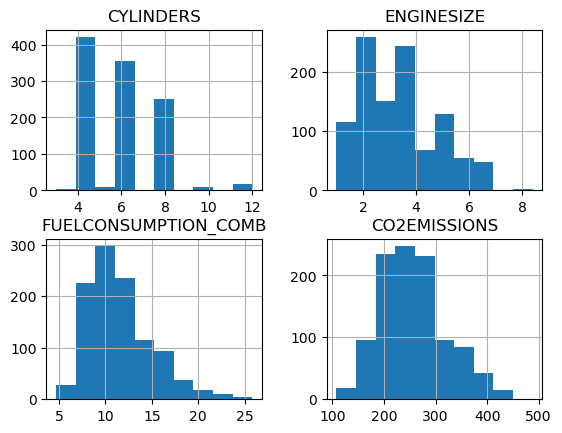

In [8]:
viz = cdf[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
viz.hist()
plt.show()

1. As we can see most engines have 4,6 or 8 cylinders, and engine sizes between 2 and 4 liters.
2. Combined fuel consumption and co2 emmisions have very similar distributions.
3. Let's plot a scatter plot for these features against CO2 Emmisions, to check how linear their relationships are.

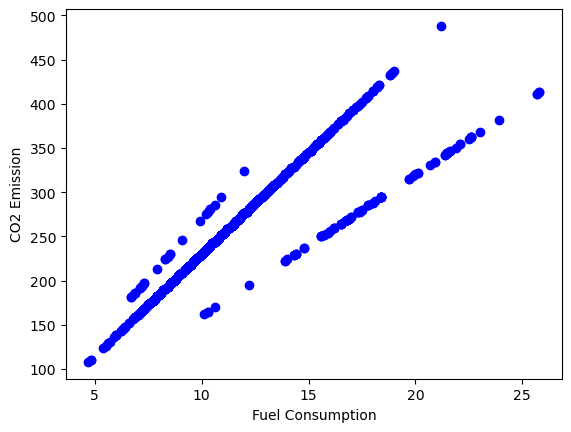

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('Fuel Consumption')
plt.ylabel('CO2 Emission')
plt.show()
           

This is an informative result. Three car groups each have a strong linear relationship between their combined fuel consumption and their CO2 emissions. Their intercepts are similar, while they noticeably differ in slope.

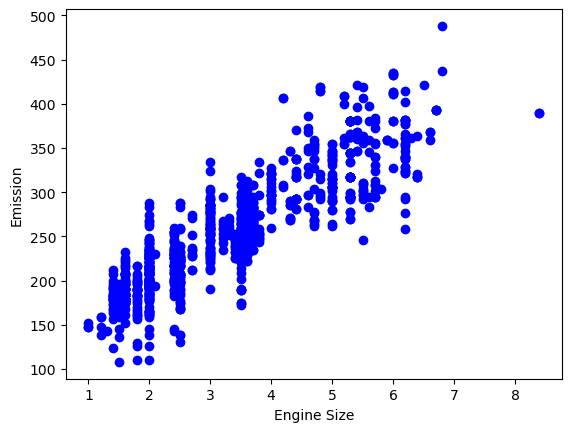

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()
            

Although the relationship between engine size and CO2 emission is quite linear, we can see that their corelation is weaker as compared to the above graph(fuel consimption combined).

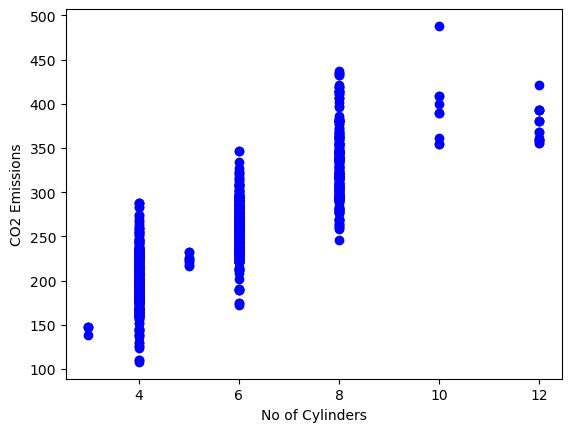

In [11]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('No of Cylinders')
plt.ylabel('CO2 Emissions')
plt.show()

#### Extract the input feature and labels from the dataset

Although not necessarily the ideal choice of input feature, but just for the illustration purposes, let's use engine size to predict CO2 emission with a linear regression model.
We can begin the process by extracting the input feature (X) and target output variables(y), from the dataset.

In [12]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

### Create, train, and test datasets

Next let's split the dataset into mutually exclusive training and testing sets. We will train a simple linear regression model on the training set and estimate its ability to generalize to unseen data by using it to make predictions on the unseen training data. 

Since the outcome of each data point is part of the testing data, we have a means of evaluating the out-of-sample accuracy of our model.

Now, we want to randomly split our data into train and test sets, using 80% of the dataset for training and reserving the remaining 20% for testing. Which fraction to use here mostly depends on the size of our data, but typically training sizes range from 20% to 30%. The smaller the data, the larger our teining set needs to be, because it's easier to find spurious patterns in smaller data. The downside is that our evaluation of generalizability will have less reliability. Bigger is better when it comes to data.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42) 

The outputs are one dimensional NumPy arrays or vectors.

In [14]:
type(X_train), np.shape(X_train)

(numpy.ndarray, (853,))

Therfore `X_train` is a NumPy array with 853 elements in a 1d (One-Dimensional) Structure.

### Build a Simple Linear Regression model

We'll use scilit-learn to build our model. See [Scikit-Learn Linear Regression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to learn all about the linear model predictor object.

In [15]:
from sklearn import linear_model

#create a model object
regression = linear_model.LinearRegression()

#train the model on the training data
# X_train is a 1-D array, but sklearn model expects a 2D array as input for the training data, with shape (n_observations, n_featues).
#so we need to reshape it. we can let it infer the number of observations using '-1'

regression.fit(X_train.reshape(-1,1), y_train)

print('Coefficient:', regression.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array
print('Intercept:', regression.intercept_)

Coefficient: 38.992978724434046
Intercept: 126.2897021740873


1. Here, **Coefficient** and **Intercept** are the regression parameters determined by the model
2. They define the slope and the intercept of the 'best-fit' line to the training data.
              `y=mx+c`

**Visualize model outputs**

We can analyze the goodness-of-fit of the model to the training data by plotting the fitted line over the data. 

The regresssion model is the line given by y = intercept + coefficient*x

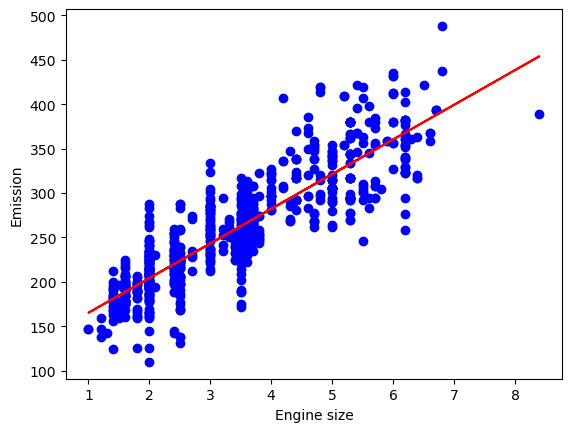

In [16]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regression.coef_*X_train + regression.intercept_, '-r')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

#### Model Evaluation

We can compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics play a key role in the development of a model, as they provide insights into areas that require improvements.

There are different evaluation metrics, let's use MSE here to calculate the accuracy of our model based on the test set:

1. Mean Absolute Error (MAE): It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it's just an averge erroe.

   In simple words - MAE is the avg of how far our predictions are from the actual values, ignoring they are too high or too low.
   Example - Suppose we're predicting house prices, and our actual vs predicted values are
   * Actual: $200k, $250k, $300k
     
   * Predicted: $210k, $240k, $290k
   
   Errors:|210-200,|240-250|,|290-300| = 10k, 10k, 10k

   MAE = (10K + 10K + 10K)/3 = $10K

Interpretation: On avg, our predictions are off by $10K.

2. Mean Squared Error (MSE): MSE is the mean of the squared error. In fact, it's the metric used by the model to find the best fit line, and for that reason, it is also called the residual sum of squares.

   In simple words - MSE takes the square of the errors before avraging. Sqauring gives more weight to bigger mistakes.
   example - Using the same house price data:
   * Errors = 10K, -10K, -10K
   * Squaring them = 100M,100M,100M
   * MSE = (100M + 100M + 100M)/3 = 100M

Interpretation: A larger number means bigger mistakes. Squaring helps highlight large errors.

3. Root Mean Squared Error (RMSE): RMSE simply transforms the MSE into the same units as the variable being compared, which can make it easier to interpret.

4. R-Squared - It's not an error but raher a popular metric used to estimate the performance of our model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits our data. The best possible score is 1 and it can be negative (because the model can be arbitrarily worse).

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

#use the predict method to make the test predictions
y_test_ = regression.predict(X_test.reshape(-1,1))

print('Mean absolute error: %.2f' % mean_absolute_error(y_test_, y_test))
print('Mean squared error: %.2f' % mean_squared_error(y_test_, y_test))
print('Root mean sqaured error: %.2f' % root_mean_squared_error(y_test_, y_test))
print('R2 - Score: %.2f' % r2_score(y_test_, y_test)) 

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean sqaured error: 31.40
R2 - Score: 0.68


### Let's plot the regression model result over the test data instead of the training data, and visually evaluate whether the result is good.

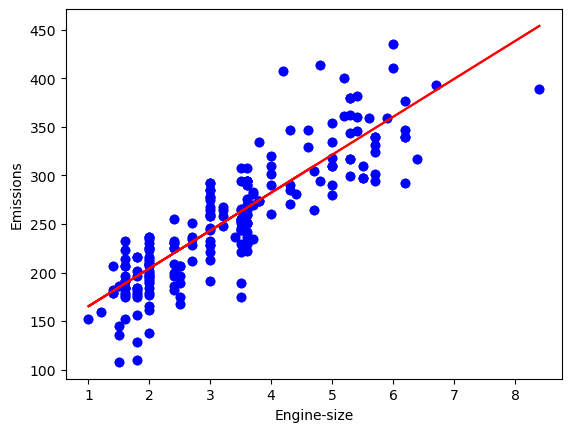

In [21]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, regression.coef_*X_test + regression.intercept_, '-r')
plt.xlabel('Engine-size')
plt.ylabel('Emissions')
plt.show()

Let's see the evaluation metrics if we train a regression model using the `FUELCONSUMPTION_COMB` feature.

### Let's se;ect the FUELCONSUMPTION_COMB feature from the dataframe and split the data 80% / 20% into training and testing sets.

Let's use the random state as previously (42) so we can make an objective comparision to the previpus training results.

In [22]:
X = cdf.FUELCONSUMPTION_COMB.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Now let's train a linear regression model using the training data we have created.

Note - we need to transform our 1D feature into a 2D array.

In [23]:
reg = linear_model.LinearRegression()
reg.fit(X_train.reshape(-1,1), y_train)

LinearRegression()

In [25]:
#Use the model to make test predictions on the fuel consumption testing data.

y_test_ = reg.predict(X_test.reshape(-1,1))

In [30]:
print('Mean Squared Error: ', mean_squared_error(y_test_, y_test))
print('R2 Score: ',  r2_score(y_test_, y_test))

Mean Squared Error:  797.4346310097205
R2 Score:  0.75619016380546


To determine which feature is better, we look at both MSE, and r2 score. **Model with low MSE value and High r2 score is the best fit**. Therefore, from the results of both the features (Engine size and Fuel Consumption Combined), FUELCONSUMPTION_COMB have less MSE and High R2 Score compaired to ENGINESIZE, so FUELCONSUMPTION_COMB gives a better model fit and explains more variance in the CO2 emission. 

# Part 2: Multiple Linear Regression

### Objectives

1. Use scikit learn to implement Multiple Linear Regression
2. Create, train and test a multiple linear regression model on real data.

In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Data set - same data set as we used for above linear regression

In [33]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Explore and Select Features

Let's select a few features to work with, that might be predictive of CO2 emissions.

In [34]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


We can notice that some of the variables are not included in the description. This is because they aren't numerical. In practice we would analyse these features if required to improve the accuracy of our model. For now, we can omit this step here. We can also notice that MODELYEAR is th esame for all cars, so we can drop these variables for this modeling illustration.

In [35]:
#drop categoricals and any useless columns
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], axis = 1)

In [36]:
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


Now that we have eliminated some featuers, let's take a look at the relationships among the remaining fatures.

Analyzing a correlation matrix that displays the pairwise correlations between all features indicates the level of independence between them.

It also indicates how predictive each feature is of the target.

We want to eliminate any strong dependencies or correlations between features by selecting the best one from each correlated group.

In [37]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


Look at the above rows, which shows the correlation between each variable and the target: 'CO2EMISSIONS'. Each of these shows fairly a high level of correltion, each exceeding 85% in magnitude. Therefore all of these variables are a good candidates.

Next, let's examine the corelation of the distinct pairs. 'ENGINESIZE' and 'CYLINDERS' are highly correlated, but 'ENGINESIZE' is more correlated with the target, so we can drop 'CYLINDERS'.

Similarly, each of the four fuel economy variables is highly correlated with each other. Since FUELCONSUMPTION_COMB_MPG is the most correlated (negative correlation) with th etarget, we can drop the others: 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', FUELCONSUMPTION_COMB'.

Notice that the FUELCONSUMPTION_COMB and FUELCONSUMPTION_COMB_MPG are not perfectly correlated. They should be, though, because they measure the same property in different units. In practice, we should investigate why this is the case. We might fins out that smoe or all of the data is not useanble as is.

In [38]:
df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB'], axis = 1)

In [39]:
df.head(9)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244
5,3.5,28,230
6,3.5,28,232
7,3.7,25,255
8,3.7,24,267


To help with predective features that are not redundant, consider the following scatter matrix, which shows the scatter plots for each pair of input features. The diagonal of the matrix shows each features histogram.

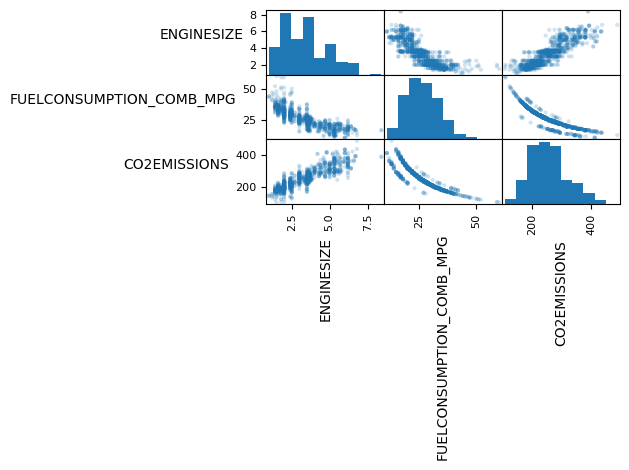

In [40]:
axes = pd.plotting.scatter_matrix(df, alpha=0.2)
#need to rotate axis labels so we can read them

for ax in axes.flatten():
    ax.xaxis.label.set_rotation (90)
    ax.yaxis.label.set_rotation (0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace = 0, hspace = 0)
plt.show()

In [41]:
df.corr()

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,-0.808554,0.874154
FUELCONSUMPTION_COMB_MPG,-0.808554,1.000000,-0.906394
CO2EMISSIONS,0.874154,-0.906394,1.000000


In [42]:
X = df.iloc[:,[0,1]].to_numpy()
y = df.iloc[:, [2]].to_numpy()

#### Preprocessing features

We should standardize our input features so the model doesn't inadvertently favour due to its magnitude. The typical way to do this is to subtract the mean and divide by the standard deviation. Scikit-lraen can do this for us. 

Standardixing our features ensures that all features contribute equally to the model, preventing those with larger magnitude from dominating.

Why standardization?
* Many machine learning models (especially regression & neural networks) perform better with standardized data.
* It centers the data around 0 and scales it to have a standard deviation of 1.
* This is especially important when features have different units (eg., height in cm, weight in kg).

X-scaled = X - mean of each feature / standard deviation of each feature

In [45]:
from sklearn import preprocessing 

std_scaler = preprocessing.StandardScaler()
X_Std = std_scaler.fit_transform(X)

In practice, if we ant to properly evaluate our model, we should definetly not apply such operations to the entire dataset, but to the train and test data separately. There's more to it than that. We will dive deeper into this and advanced evaluation pitfalls later in the course.

In [47]:
pd.DataFrame(X_Std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


As we can see, a standardized variable has zero mean and a standard deviation of one.

### Create, train and test datasets

Let's randomly split data into train and test sets, using 80% and 20% data for tarining aand testing .

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_Std, y, test_size = 0.2, random_state = 42)

### Building a Multiple Linear Regression Model

Multiple and simple linear regression models can be implemented with exactly the same scikit-learn tools.

In [50]:
from sklearn import linear_model

#create a model object
regression1 = linear_model.LinearRegression()

regression1.fit(X_train, y_train)

LinearRegression()

In [51]:
print('Coefficient: ', regression1.coef_)
print('Intercept: ', regression1.intercept_)

Coefficient:  [[ 25.27339614 -37.4381472 ]]
Intercept:  [256.29072488]


When we train a linear regression model on standardized data, the model learns scaled coefficients, but we often want to interpret the results in the original feature space.

The coefficient and the intercept define the best-fit hyperplane to the data. Since, there are only two variable, henc two parameters, the hyperplane is a plane. But this best-fit plane will look different in th eoriginal, unstandardizd feature space.

We can transform our modle's parameters back to the original space prior to standardization as follows. This gives us a proper sense of what they mean in jterms of our original input features. Without these adjustments, the model's output would be tied to an abstract, transformed space that doesn't align with the actual independent variables and the real-world problem we're solving.

In [59]:
#get the standard scaler's mean and standard deviation parameters
means_ = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)

#the least squares parameters can be calculated relative to the original, unstandardized feature space as:
coef_original = regression1.coef_/std_devs_
intercept_original = regression1.intercept_ - np.sum((means_ * regression1.coef_)/std_devs_)

print('Coefficients: ', coef_original)
print('Intercept: ', intercept_original)

Coefficients:  [[17.8581369  -5.01502179]]
Intercept:  [329.1363967]


We would expect that the for the limiting case of zero ENGINESIXE and zero FUELCOSUMPTION_COMB_MPG, the resulting CO2EMISSION should also be zero. This is inconsistent with the 'best fit' hyperplane, which is a non-zero incercept of 329g/km.

Why is the intercept non-zero in the CO2 emission?

In a linear regression model, the equation for predicting CO2 Emissions (in grams per kilometer) based on engine size and fuel consumption is typically:

              Y = c + m1x1 + m2x2 + m3x3 + .......

where:
1. c = The intercept (i.e value of Y when all input variables are zero), in our case value of CO2 emissions when all input variables are zero.
2. m1, m2, m3,.... = the model's coeffients.

We would expect that when ENGINESIZE = 0and FUELCONSUMPTION = 0, the CO2 emissions should also be 0g/km. However, the model gives a non-zero intercept of 329g/km, which seems physically un realistic.

The answer must be that the target variable doen't have a very strong linear relationship to the dependent variables, and/or the data has outliers that are biasing the result. Outliers can be handled in preprocessing, or as we will learn about later in the course, by using regularization techniques to the target. Or there may still be some colinearity among the input variables.

#### Visualize model output

We can visualize the goodness of fit of the model to the training data by plotting the fitted plane over the data.

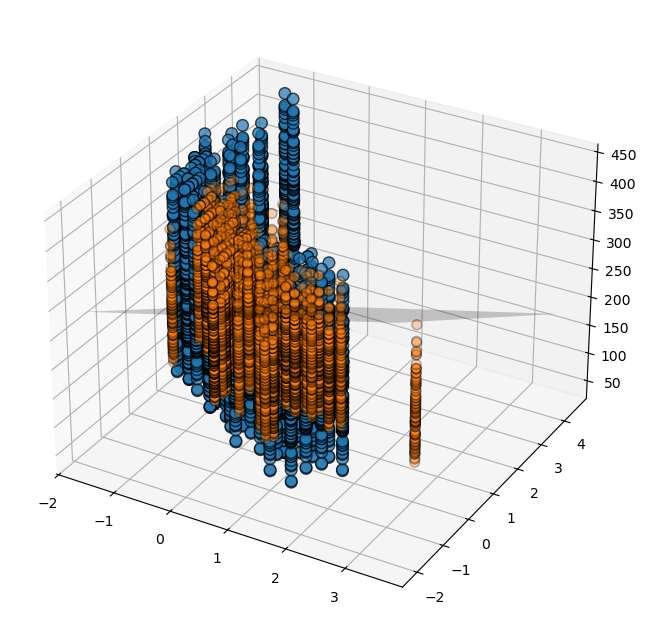

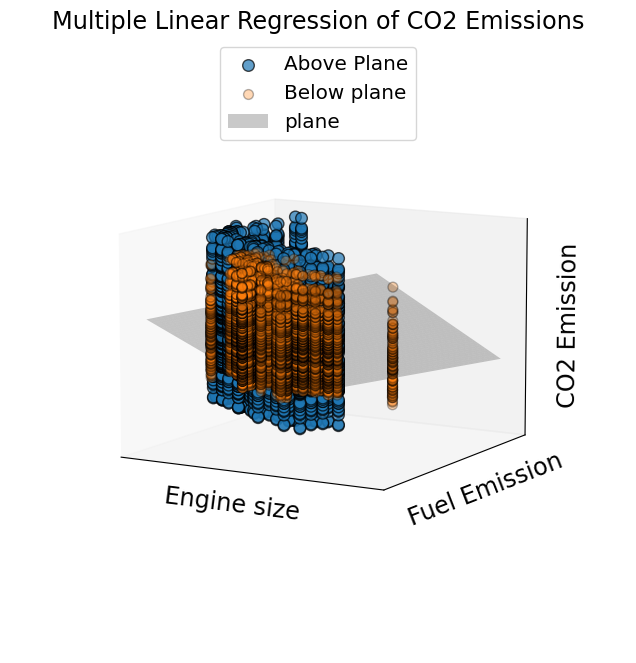

In [63]:
coef_ = regression1.coef_
intercept_ = regression1.intercept_

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

#ensure X1, X2, and y_test have compatable shapes for 3D plotting
X1 = X_test[:,0] if X_test.ndim > 1 else X_test
X2 = X_test[:,1] if X_test.ndim > 1 else np.zero_like(X1)

#create a mesh grid for plotting the regression plane
x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(),100), np.linspace(X2.min(), X2.max(), 100))

y_surf = intercept_ + coef_[0,0]*x1_surf + coef_[0,1]*x2_surf

#predict y values using trained regression model to compare with actual y_test for above/below plane colors
y_pred = regression1.predict(X_test.reshape(-1,1)) if X_test.ndim == 1 else regression1.predict(X_test)
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane [:,0]
below_plane = below_plane [:,0]

#plotting
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(111, projection = '3d')

#plot the data points above and below the plane in different colors
ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane], label = 'Above Plane', s= 70, alpha = .7, ec = 'k')
ax.scatter(X1[below_plane], X2[below_plane], y_test[below_plane], label = 'Below plane', s=50, alpha = .3, ec = 'k')

#plot the regression line
ax.plot_surface(x1_surf, x2_surf, y_surf, color ='k', alpha = 0.21, label = 'plane')

#set view and labels
ax.view_init(elev = 10)

ax.legend(fontsize = 'x-large', loc = 'upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom = 0.75)
ax.set_xlabel('Engine size', fontsize = 'xx-large')
ax.set_ylabel('Fuel Emission', fontsize = 'xx-large')
ax.set_zlabel('CO2 Emission', fontsize = 'xx-large')
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize = 'xx-large')
plt.tight_layout
plt.show()

Instead of making a 3D plot, which is difficult to interpret, we can look at vertical slices of the 3D plot by plotting each variable seperately as a best-fit line using the corresponding regression parameters.

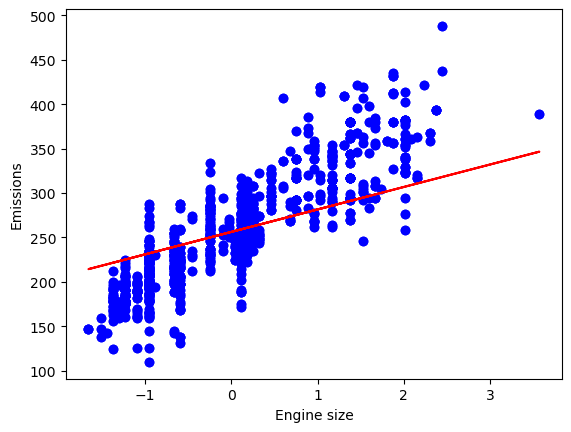

In [65]:
plt.scatter(X_train[:,0], y_train, color = 'blue')
plt.plot(X_train[:,0], coef_[0,0]*X_train[:,0] + intercept_[0], '-r')
plt.xlabel('Engine size')
plt.ylabel('Emissions')
plt.show()

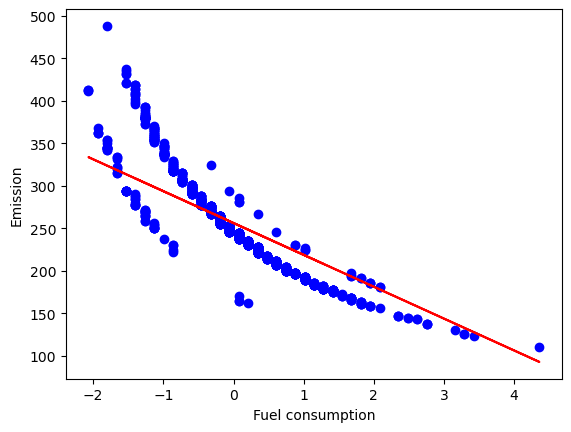

In [67]:
plt.scatter(X_train[:,1], y_train, color = 'blue')
plt.plot(X_train[:,1], coef_[0,1]*X_train[:,1] + intercept_[0], '-r')
plt.xlabel('Fuel consumption')
plt.ylabel('Emission')
plt.show()

Evidently, the solution is incredibly poor beacause the model is trying to fit a plane to a non-planar surface.

**Determinr and print the parameters for the best-fit linear regression line for CO2 emission with respect to engine size.**

In [69]:
X_train_1 = X_train[:,0]
regression_1 = linear_model.LinearRegression()
regression_1.fit(X_train_1.reshape(-1,1), y_train)
coef_1 = regression_1.coef_
intercept_1 = regression_1.intercept_
print('Coefficients: ', coef_1)
print('Intercept: ', intercept_1)

Coefficients:  [[55.18408797]]
Intercept:  [256.77183014]


**Let's plots a scatterplot of CO2 Emissions against ENGINESIZE and include the best-fit regression line to the training data.**

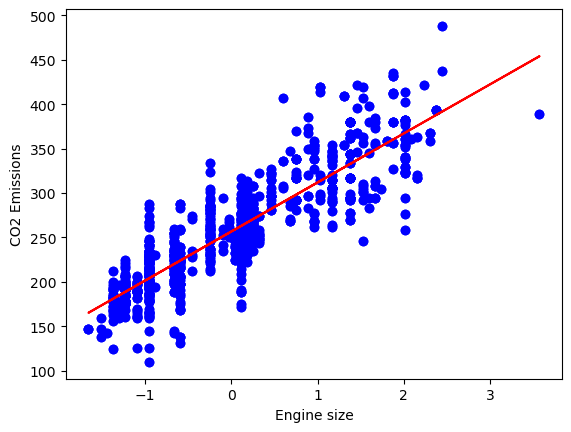

In [71]:
plt.scatter(X_train_1, y_train, color = 'blue')
plt.plot(X_train_1, coef_1[0]*X_train_1 + intercept_1, '-r')
plt.xlabel('Engine size')
plt.ylabel('CO2 Emissions')
plt.show()

Evidently, this simple linear regression model provides a much better fit of CO2 emissions on the training data than the multiple regression model did. Let's see what its performance is on the test data.

**Generate a scatter plot for best fit regression line, but now the results on the test data set. Consider how the test results compares to the training result.**

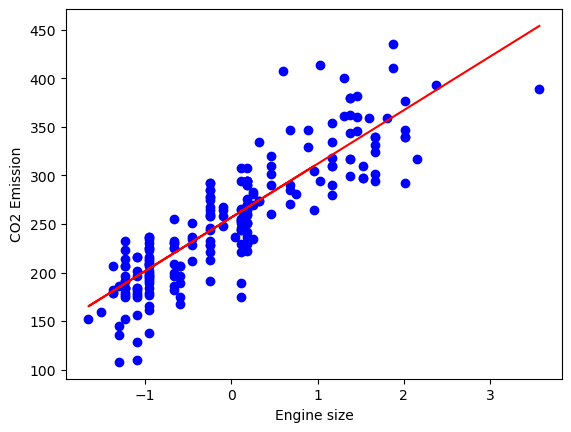

In [73]:
X_test_1 = X_test[:,0]
plt.scatter(X_test_1, y_test, color = 'blue')
plt.plot(X_test_1, coef_1[0]*X_test_1 + intercept_1, '-r')
plt.xlabel('Engine size')
plt.ylabel('CO2 Emission')
plt.show()

Let's repeat the same modeling but using FUELCONSUMPTION_COMB_MPG as the independent variable instead.

In [74]:
X_train_2 = X_train[:,1]
regression_2 = linear_model.LinearRegression()
regression_2.fit(X_train_2.reshape(-1,1), y_train)
coef_2 = regression_2.coef_
intercept_2 = regression.intercept_
print('Coefficient: ', coef_2)
print('Intercept: ', intercept_2)

Coefficient:  [[-58.51827989]]
Intercept:  126.2897021740873


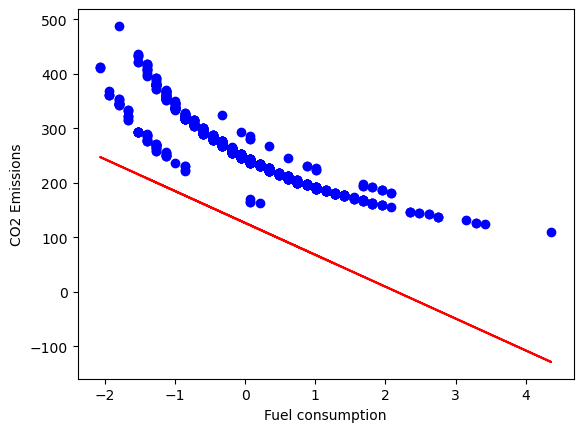

In [75]:
plt.scatter(X_train_2, y_train, color='blue')
plt.plot(X_train_2, coef_2[0]*X_train_2 + intercept_2, '-r')
plt.xlabel('Fuel consumption')
plt.ylabel('CO2 Emissions')
plt.show()

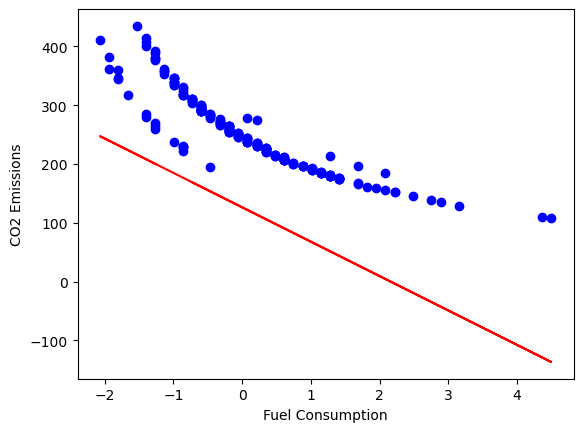

In [76]:
X_test_2 = X_test[:,1]
plt.scatter(X_test_2, y_test, color = 'blue')
plt.plot(X_test_2, coef_2[0] * X_test_2 + intercept_2, '-r')
plt.xlabel('Fuel Consumption')
plt.ylabel('CO2 Emissions')
plt.show()